# Module 3.2: Plotting with matplotlib

![matplotlib](https://matplotlib.org/3.1.1/_static/logo2.png)

[matplotlib](https://matplotlib.org/) is a very versatile plotting package for Python. It can create virtually any kind of 2D graphs in professional publication quality.

We import the `pyplot` sub-package and alias it to the name `plt`:

In [45]:
import matplotlib.pyplot as plt

In case you do not see figures in the notebook when you execute `plt.plot()`, execute the next line with the "magic" notebook command. It also makes `plt.show()` superfluous in the notebook; in other contexts you need to issue the `plt.show()` command to see a figure. 

In [46]:
%matplotlib inline

## Function: vertical throw (again)
We will use the trajectory of the the vertical throw as an example throughout:

$$
y(t) = \begin{cases}
  -\frac{1}{2}gt^2 + v_0 t + y_0 &\quad\text{if}\ y > 0 \\
  0 & \quad\text{if}\ y \le 0 
  \end{cases}
$$

We define a Python function that takes `t` as an argument `v0` and `y0` as keyword arguments so that we can easily plot trajectories for different scenarios.

In [47]:
g = 9.81

def ythrow(t, v0=10, y0=2):
    y = -0.5*g*t**2 + v0*t + y0
    if y <= 0:
        y = 0
    return y

## Plotting a function 

We plot discrete pairs $(t, y(t))$. We first need to generate these points by 
1. generating all $t$ values for given spacing $\Delta t$
2. evaluating the function $y(t)$

### Lists of $t$ and $y(t)$ values 

Create a list of times `t` for which we want to evaluate the function:

In [48]:
dt = 0.1
tmax = 10

t_values = [i*dt for i in range(int(tmax//dt) + 1)]

In [49]:
t_values[:3]

[0.0, 0.1, 0.2]

In [50]:
t_values[-3:]

[9.700000000000001, 9.8, 9.9]

Evaluate the function for all t values:

In [51]:
y_values = [ythrow(t) for t in t_values]

In [52]:
y_values[:3], y_values[-3:]

([2.0, 2.9509499999999997, 3.8038], [0, 0, 0])

### plt.plot() 

Plot with [matplotlib.pyplot.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html):
```python
plt.plot(x, y, ...)
```
where the important arguments are two list-like expressions `x` and `y` that contain the abscissa (x) and corresponding ordinate (y) values. Some of the other arguments to change the plot appearance will be discussed later.

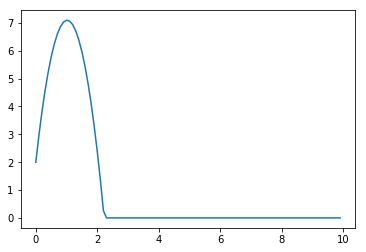

In [28]:
plt.plot(t_values, y_values)

Change appearance of the plot using keywords:

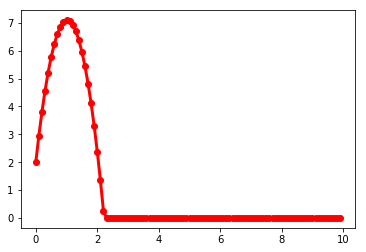

In [53]:
plt.plot(t_values, y_values, color="red", linewidth=3, marker="o")

Sometimes a short-cut notation is used for color and marker with `linestyle='-'` (the default in the example above): `o-r` for "circular markers, solid line, red color".

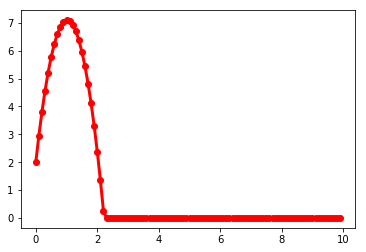

In [35]:
plt.plot(t_values, y_values, 'o-r', linewidth=3)

See the [matplotlib.pyplot.plot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) docs for the various values of the options.

For example, blued dashed lines with squares:

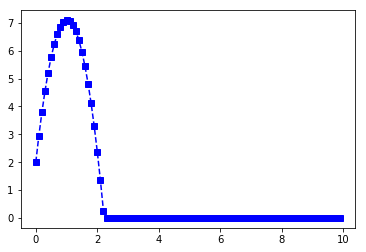

In [33]:
plt.plot(t_values, y_values, color="blue", marker="s", linestyle="--")

### Annotating the plot

Imagine that matplotlib opens a canvas and each command draws on the canvas; the canvas is called a **figure** in matplotlib.

(In the Jupyter notebook, a figure belongs to a cell. If you are using matplotlib outside the notebook then by default all plotting commands will draw into the same figure. There are ways to draw in a specific figure but we will discuss this when talking about more advanced matplotlib use in a future module.)

Each figure contains one or more **axes** – the "graph" or "plot". Most matplotlib commands affect the currently active axes, for example
- add axes labels with `xlabel()` and `ylabel()`
- add a plot title with `title()`

#### Add axes labels 

Text(0, 0.5, 'y (m)')

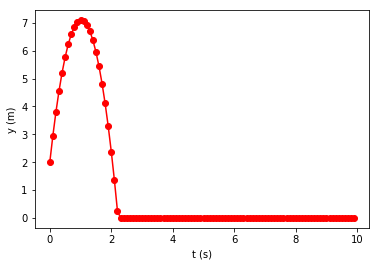

In [34]:
plt.plot(t_values, y_values, color="red", marker="o")
plt.xlabel("t (s)")
plt.ylabel("y (m)")

#### Add a title 

Text(0.5, 1.0, 'Vertical throw')

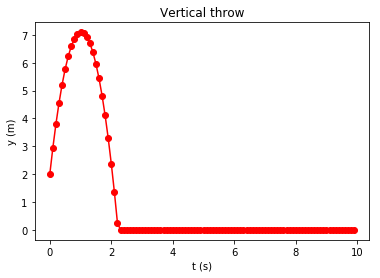

In [36]:
plt.plot(t_values, y_values, color="red", marker="o")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.title("Vertical throw")

### Multiple plots in one axes
All plots are added to the same axes. Thus we can easily add multiple graphs for, say, different initial velocities $v_0$.

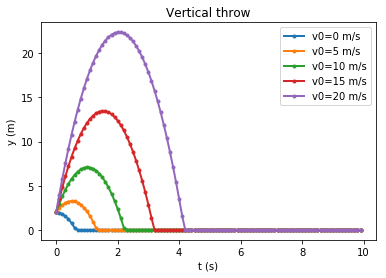

In [40]:
v0_values = [0, 5, 10, 15, 20]
for v0 in v0_values:
    y_values = [ythrow(t, v0=v0) for t in t_values]
    plt.plot(t_values, y_values, linewidth=2, marker=".", 
             label="v0={} m/s".format(v0))
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.title("Vertical throw")
plt.legend(loc="best")

- By default, matplotlib cycles through colors.
- The `label` keyword associates a string with a graph.
- The `legend()` command adds the labels as a legend to the axes.

## Output: saving figures

The current figure can be saved with [matplotlib.pyplot.savefig()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html):

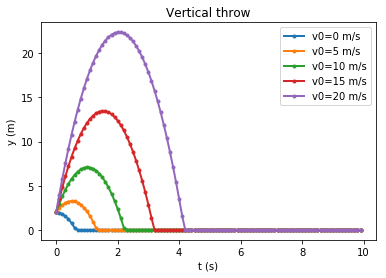

In [44]:
# create the figure in this notebook cell
v0_values = [0, 5, 10, 15, 20]
for v0 in v0_values:
    y_values = [ythrow(t, v0=v0) for t in t_values]
    plt.plot(t_values, y_values, linewidth=2, marker=".", 
             label="v0={} m/s".format(v0))
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.title("Vertical throw")
plt.legend(loc="best")

# save the figure
plt.savefig("vertical_throws.png")

* The output format can be set through the filename extension, e.g., `.jpg`, `.svg`, `.pdf` or via the `format="png"` keyword argument. See [matplotlib.pyplot.savefig()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) for details.
* In the Jupyter Notebook you must save the figure in the same cell where the figure was created. In the normal Python interpreter, you can `savefig()` whenever you want.